<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/hccho2/DL-UPMTP/blob/master/DL-TF-TORCH-CH6-CNN.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 다시 시작해야 함.

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')

# 6.1 Sobel Operator

In [ ]:
from PIL import Image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = Image.open('original_image.png')

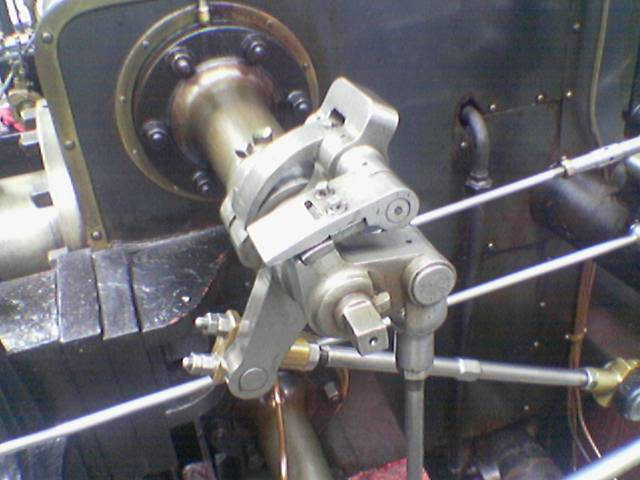

In [ ]:
img

In [ ]:
img_input = np.array(img.convert('L'))/255.
img_input = img_input[:,:,None]
img_input.shape

(480, 640, 1)

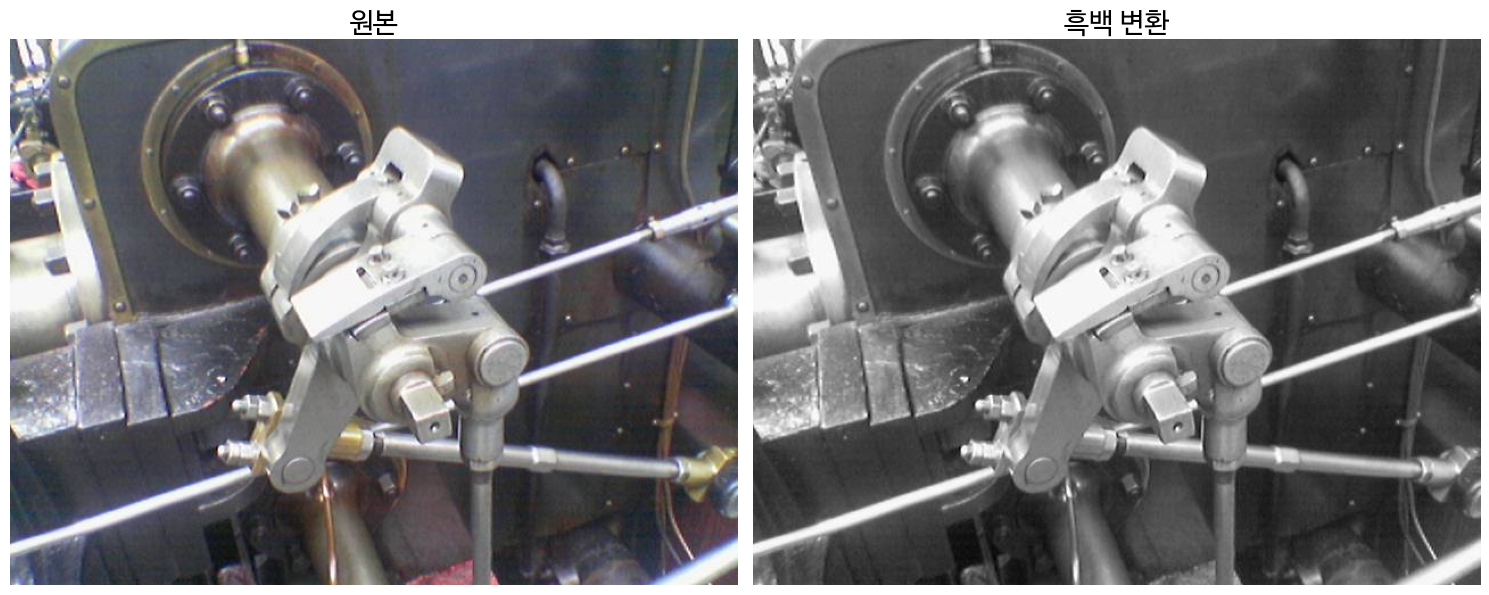

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('원본',fontsize=20)
plt.subplot(1,2,2)
plt.imshow(img_input[:,:,0],cmap='gray')
plt.axis('off')
plt.title('흑백 변환',fontsize=20)
plt.tight_layout()

In [ ]:
Gx= np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]).astype(np.float32)
Gx = Gx.reshape(3,3,1,1)

Gy= np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]).astype(np.float32)
Gy = Gy.reshape(3,3,1,1)

In [ ]:
output_X =tf.nn.conv2d(img_input[None,:,:,:],Gx,strides=1,padding='VALID').numpy()
output_Y =tf.nn.conv2d(img_input[None,:,:,:],Gy,strides=1,padding='VALID').numpy()

output = np.sqrt((output_X**2 + output_Y**2))
output.shape

(1, 478, 638, 1)

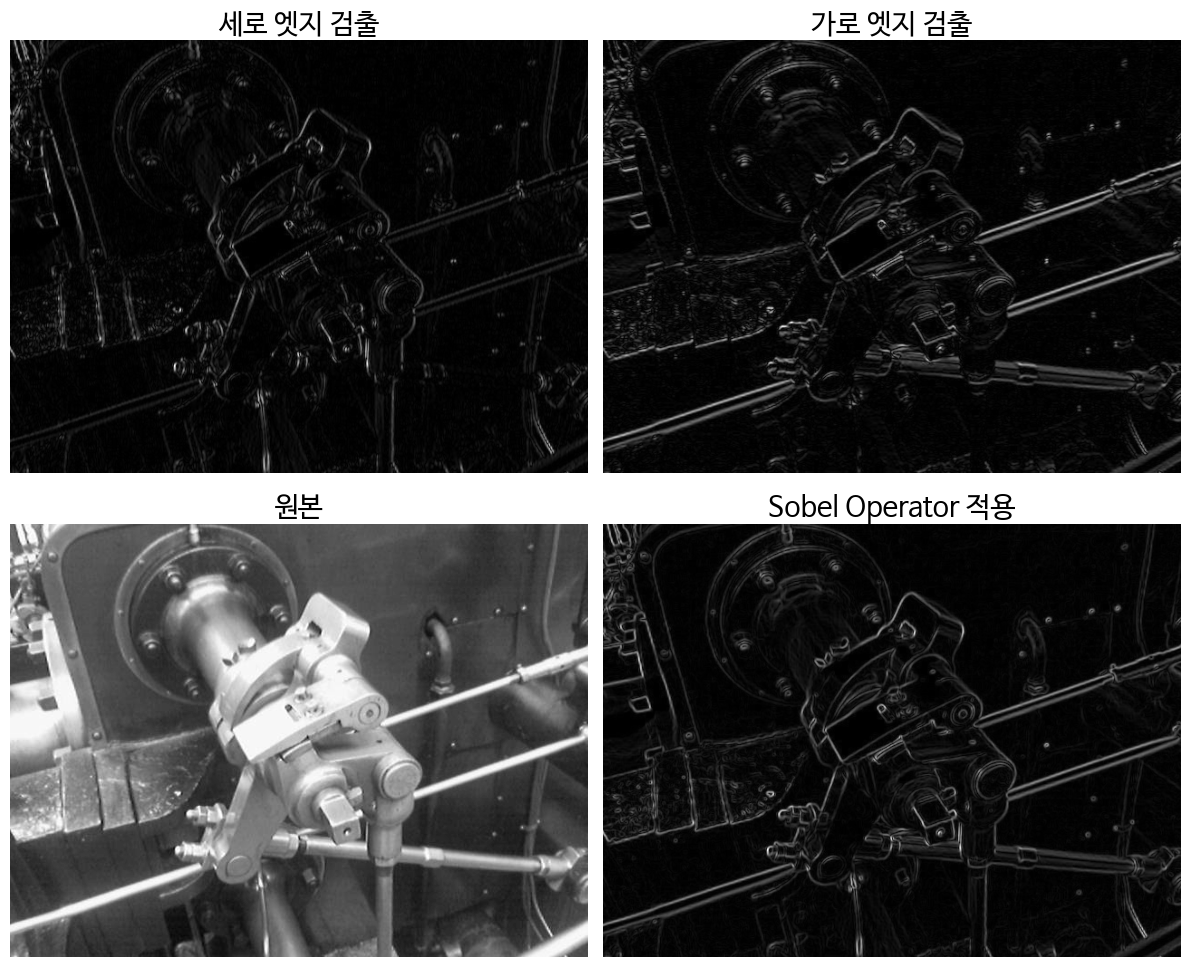

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.imshow(np.abs(output_X[0,:,:,0]),cmap='gray')
plt.axis('off')
plt.title('세로 엣지 검출',fontsize=20)
plt.subplot(2,2,2)
plt.imshow(np.abs(output_Y[0,:,:,0]),cmap='gray')
plt.axis('off')
plt.title('가로 엣지 검출',fontsize=20)

plt.subplot(2,2,3)
plt.imshow(img_input[:,:,0],cmap='gray')
plt.axis('off')
plt.title('원본',fontsize=20)
plt.subplot(2,2,4)
plt.imshow(output[0,:,:,0],cmap='gray')
plt.axis('off')
plt.title('Sobel Operator 적용',fontsize=20)
plt.tight_layout()

### Sharpening Filter

In [ ]:
Sharpening1= np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]).astype(np.float32)
Sharpening1 = Sharpening1.reshape(3,3,1,1)

Sharpening2= np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]).astype(np.float32)
Sharpening2 = Sharpening2.reshape(3,3,1,1)

In [ ]:
output_sharpen1 =tf.nn.conv2d(img_input[None,:,:,:],Sharpening1,strides=1,padding='VALID').numpy()
output_sharpen1 = np.abs(output_sharpen1)

output_sharpen2 =tf.nn.conv2d(img_input[None,:,:,:],Sharpening2,strides=1,padding='VALID').numpy()
output_sharpen2 = np.abs(output_sharpen2)

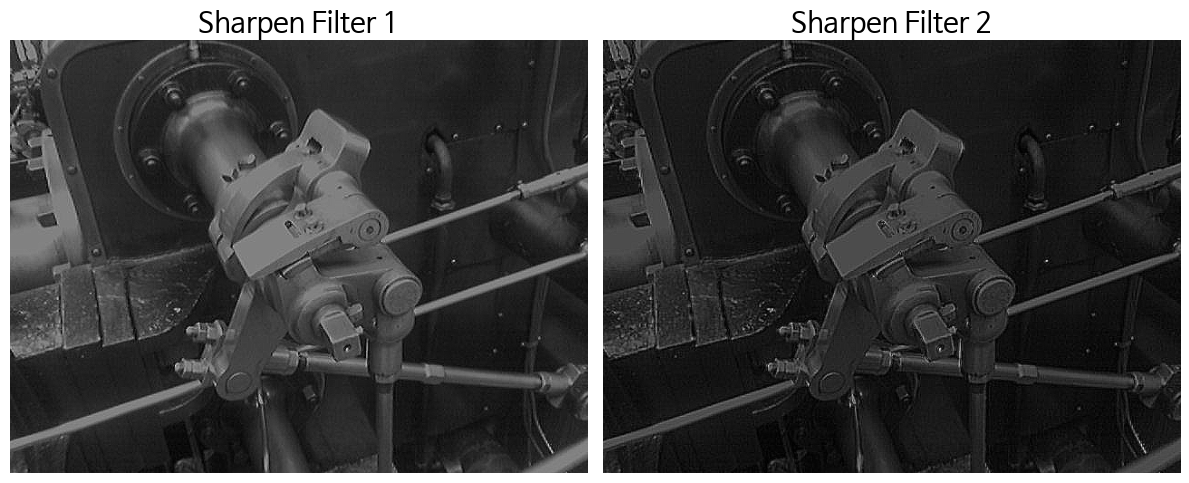

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(np.abs(output_sharpen1[0,:,:,0]),cmap='gray')
plt.axis('off')
plt.title('Sharpen Filter 1',fontsize=20)
plt.subplot(1,2,2)
plt.imshow(np.abs(output_sharpen2[0,:,:,0]),cmap='gray')
plt.axis('off')
plt.title('Sharpen Filter 2',fontsize=20)

plt.tight_layout()

# 6.2 Convolution

In [ ]:
from PIL import Image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import torch

In [ ]:
I_R = np.array([[1,3,2,2,3,0,2],
                [3,3,0,1,0,1,2],
                [2,0,0,2,3,2,1],
                [2,0,1,3,3,3,0],
                [0,2,0,0,3,0,0],
                [2,1,3,3,0,0,1],
                [2,0,2,0,2,0,0]]).astype(np.float32)

I_G = np.array([[0,3,2,3,2,3,3],
                [3,3,0,1,3,2,2],
                [1,1,2,0,1,0,0],
                [3,1,0,1,1,1,2],
                [0,3,0,0,0,3,3],
                [1,3,3,2,0,0,2],
                [2,3,0,0,0,2,2]]).astype(np.float32)

I_B = np.array([[3,2,3,2,3,3,3],
                [3,0,1,3,2,2,2],
                [1,2,0,1,0,0,0],
                [1,0,1,1,1,2,1],
                [3,0,0,0,3,3,2],
                [3,3,2,0,0,2,3],
                [3,0,0,0,2,2,0]]).astype(np.float32)
I = np.stack([I_R,I_G,I_B],axis=2)[None,:,:,:]  # (1,7,7,3)

In [ ]:
F1 = np.array([[1,1,-1,1],
                [-1,0,-1,0],
                [-1,0,1,1],
                [0,1,1,1]]).astype(np.float32)
F2 = np.array([[-1,-1,1,-1],
            [0,-1,0,1],
            [-1,1,0,0],
            [0,0,-1,1]]).astype(np.float32)
F3 = np.array([[0,1,-1,-1],
            [-1,1,-1,-1],
            [1,0,-1,-1],
            [1,0,-1,1]]).astype(np.float32)
F = np.stack([F1,F2,F3],axis=2)[:,:,:,None] # (4, 4, 3, 1)

In [ ]:
o1 = tf.nn.conv2d(I_R[None,:,:,None],F1[:,:,None,None],strides=1,padding='VALID').numpy()
o2 = tf.nn.conv2d(I_G[None,:,:,None],F2[:,:,None,None],strides=1,padding='VALID').numpy()
o3 = tf.nn.conv2d(I_B[None,:,:,None],F3[:,:,None,None],strides=1,padding='VALID').numpy()
output = tf.nn.conv2d(I,F,strides=1,padding='VALID').numpy()

In [ ]:
print("o1", o1[0,:,:,0])
print("o2", o2[0,:,:,0])
print("o3", o3[0,:,:,0])
print("output", output[0,:,:,0])
print("sum: ", (o1+o2+o3)[0,:,:,0])

o1 [[ 5. 14. 15. 12.]
 [ 9.  9.  7.  1.]
 [ 8.  5.  3. -1.]
 [10.  5.  0.  3.]]
o2 [[ -5.   0.  -7.  -4.]
 [-10.  -7.   4.  -5.]
 [  2.  -8.  -1.   2.]
 [ -6.  -1.   3.  -2.]]
o3 [[ -9.  -5.  -4.  -7.]
 [ -2.  -6.  -2.  -6.]
 [  2.  -2.  -4.  -7.]
 [ -1.   1.  -8. -11.]]
output [[ -9.   9.   4.   1.]
 [ -3.  -4.   9. -10.]
 [ 12.  -5.  -2.  -6.]
 [  3.   5.  -5. -10.]]
sum:  [[ -9.   9.   4.   1.]
 [ -3.  -4.   9. -10.]
 [ 12.  -5.  -2.  -6.]
 [  3.   5.  -5. -10.]]


## 6.2.2 Convolution API

In [ ]:
# Pytorch
I_torch = torch.Tensor(I).permute(0,3,1,2) #(N,H,W,C) --> (N,C,H,W) ->  (1,3,7,7)
F_torch = torch.Tensor(F).permute(3,2,0,1) #(FH,FW,in_channel,out_channel) --> (out_channel,in_channel,FH,FW)  -> (1,3,4,4)
output_torch = torch.nn.functional.conv2d(I_torch,F_torch) # (1,1,4,4)
print(output_torch)  # Tensorflow에서의 결과와 동일

tensor([[[[ -9.,   9.,   4.,   1.],
          [ -3.,  -4.,   9., -10.],
          [ 12.,  -5.,  -2.,  -6.],
          [  3.,   5.,  -5., -10.]]]])


In [ ]:
output_torch.shape, output.shape

(torch.Size([1, 1, 4, 4]), (1, 4, 4, 1))

## 6.2.3 Im2Col

In [ ]:
import numpy as np
import tensorflow as tf
import torch
np.set_printoptions(precision=4)

In [ ]:
# 출처: cs231n 강좌 http://cs231n.stanford.edu/index.html

def get_im2col_indices(x_shape, field_height, field_width, padding=1, stride=1):
    N, C, H, W = x_shape # channel first
    out_height = (H + 2 * padding - field_height) // stride + 1
    out_width = (W + 2 * padding - field_width) // stride + 1

    i0 = np.repeat(np.arange(field_height), field_width)
    i0 = np.tile(i0, C)
    i1 = stride * np.repeat(np.arange(out_height), out_width)
    j0 = np.tile(np.arange(field_width), field_height * C)
    j1 = stride * np.tile(np.arange(out_width), out_height)

    i = i0.reshape(-1, 1) + i1.reshape(1, -1)
    j = j0.reshape(-1, 1) + j1.reshape(1, -1)
    k = np.repeat(np.arange(C), field_height * field_width).reshape(-1, 1)
    return (k, i, j)

def im2col_indices(x, field_height, field_width, padding=1, stride=1):
    p = padding
    x_padded = np.pad(x, ((0, 0), (0, 0), (p, p), (p, p)), mode='constant')

    k, i, j = get_im2col_indices(x.shape, field_height, field_width, padding, stride)

    cols = x_padded[:, k, i, j]
    C = x.shape[1]
    cols = cols.transpose(1, 2, 0).reshape(field_height * field_width * C, -1)
    return cols

def conv_forward_im2col(x, w, b, conv_param):
    """
    A fast implementation of the forward pass for a convolutional layer
    based on im2col and col2im.
    """
    N, C, H, W = x.shape
    num_filters, _, filter_height, filter_width = w.shape
    stride, pad = conv_param['stride'], conv_param['pad']

    # Create output
    out_height = (H + 2 * pad - filter_height) // stride + 1
    out_width = (W + 2 * pad - filter_width) // stride + 1
    out = np.zeros((N, num_filters, out_height, out_width), dtype=x.dtype)

    x_cols = im2col_indices(x, w.shape[2], w.shape[3], pad, stride)
    res = w.reshape((w.shape[0], -1)).dot(x_cols) + b.reshape(-1, 1)

    out = res.reshape(w.shape[0], out.shape[2], out.shape[3], x.shape[0])
    out = out.transpose(3, 0, 1, 2)

    cache = (x, w, b, conv_param, x_cols)
    return out, cache

In [ ]:
# test code
x = np.arange(147).reshape(3,7,7)[None]  # x: (N,C,H,W)
y = im2col_indices(x,5,5,0,1) #FH=FW=5
print(y.shape)  # (C x FH x FW, 1 x OH x OW) = (3x5x5,1x3x3) = (75,9)

(75, 9)


In [ ]:
# test code
N=2; H=W=8
C=3; FN=5
FH=FW=5
p=1; s=2

OH = (H + 2*p - FH) // s + 1
OW = (W + 2*p - FW) // s + 1

x = np.random.randn(N,C,H,W)  # x: (N,C,H,W)
y = im2col_indices(x,FH,FW,p,s)
print(y.shape)
print(f'(OH,OW)=({OH}, {OW}), ({C*FH*FW}, {N*OH*OW})')  # (C x FH x FW, N x OH x OW)

(75, 18)
(OH,OW)=(3, 3), (75, 18)


In [ ]:
# tensorflow, pytorch와 convolution 결과 비교

stride=2;pad=2;
conv_param = {'stride': stride, 'pad': pad}
c_in = 3; c_out=2
FH=5; FW=5
H=10; W=10
batch_size=2

OH = int((H-FH+2*pad)/stride) + 1
OW = int((W-FW+2*pad)/stride) + 1

x = np.random.randn(batch_size,c_in,H,W)  # channel first
y = im2col_indices(x,FH,FW,conv_param['pad'],conv_param['stride'])
print("im2col shape: ", y.shape)  # (c_in*FH*FW,batch_size*OH*OW)

w = np.random.normal(size=(c_out,c_in,FH,FW))
b = np.random.normal(size=c_out)

# numpy
conv_numpy,_ = conv_forward_im2col(x, w, b, conv_param)

# tensorflow
#x_padded = np.pad(x, ((0, 0), (0, 0), (pad, pad), (pad, pad)))
channel_last = False
if channel_last or not tf.config.list_physical_devices('GPU'):
    conv_tf = tf.nn.conv2d(x.transpose(0,2,3,1),w.transpose(2,3,1,0),strides=conv_param['stride'],padding=[[0,0],[pad,pad],[pad,pad],[0,0]],data_format='NHWC') + b
    conv_tf = conv_tf.numpy().transpose(0,3,1,2) # channel last -> channel first
else:
    conv_tf = tf.nn.conv2d(x,w.transpose(2,3,1,0),strides=conv_param['stride'],padding=[[0,0],[0,0],[pad,pad],[pad,pad]],data_format='NCHW') + b.reshape(1,-1,1,1) # only GPU
    conv_tf = conv_tf.numpy()

# pytorch
conv_torch = torch.nn.functional.conv2d(torch.Tensor(x),torch.Tensor(w),torch.Tensor(b),conv_param['stride'],conv_param['pad'])
conv_torch=conv_torch.numpy()

print("convolution shape: ", conv_numpy.shape, conv_tf.shape, conv_torch.shape)
print("numpy-Tensorflow: ", np.allclose(conv_numpy,conv_tf,atol=1e-05))
print("numpy-pytorch: ", np.allclose(conv_numpy,conv_torch,atol=1e-05))

print('numpy: ', conv_numpy,'\n\n', 'Tensorflow: ',conv_tf,'\n\n', 'Pytorch: ', conv_torch)  # ==> 결과가 같다.

im2col shape:  (75, 50)
convolution shape:  (2, 2, 5, 5) (2, 2, 5, 5) (2, 2, 5, 5)
numpy-Tensorflow:  True
numpy-pytorch:  True
numpy:  [[[[ -4.665   -5.559   -2.7865  -0.3727  -3.0349]
   [ 11.6863 -16.764    6.2983  -5.2801   3.6711]
   [  8.4018   7.5211   5.6177 -13.5313 -15.2584]
   [  1.3211   5.3661   5.9007   3.1055 -11.0989]
   [ -1.1896   3.5401  -3.4535  -4.1918   6.5815]]

  [[ -6.6118  -0.4323   8.2494   5.0098 -11.7617]
   [  5.9362 -14.5788  -4.4292  -4.4691   4.5639]
   [ 10.9193   3.5828  -1.5985   4.6225   5.7687]
   [  7.9834  17.1536  14.2826   0.81     0.0702]
   [ -9.8909   3.0232   3.4745  18.0995   1.5653]]]


 [[[ -1.0604   7.2469   1.5567   6.5335   8.3464]
   [ -0.2632   4.5458   5.5285  -5.311   -6.7535]
   [  1.9024   7.9102  -4.3097   2.2943  -3.4474]
   [ -2.6284  -8.1185   6.0677  11.435    1.5052]
   [ -2.7066 -10.2357 -10.5157  -7.4013   8.2295]]

  [[  5.3158   2.5991  -8.0223   4.6155   2.841 ]
   [ -2.9254  11.0798 -14.1251   8.5683   3.0342]
   [  

## 6.2.4 Col2Im

In [ ]:
def col2im_indices(cols, x_shape, field_height=3, field_width=3, padding=1,stride=1):
    N, C, H, W = x_shape
    H_padded, W_padded = H + 2 * padding, W + 2 * padding
    x_padded = np.zeros((N, C, H_padded, W_padded), dtype=cols.dtype)
    k, i, j = get_im2col_indices(x_shape, field_height, field_width, padding, stride)
    cols_reshaped = cols.reshape(C * field_height * field_width, -1, N)  # (CxFHxFW,OHxOWxN) --> (CxFHxFW,OHxOW,N)
    cols_reshaped = cols_reshaped.transpose(2, 0, 1)  # batch 차원을 앞으로...
    np.add.at(x_padded, (slice(None), k, i, j), cols_reshaped)
    if padding == 0:
        return x_padded
    return x_padded[:, :, padding:-padding, padding:-padding]

def conv_backward_im2col(dout, cache):
    """
    dout: (N,FN,OH,OW), convolution의 gradient
    dout으로 부터, filter kernel, bias, 입력 이미지 각각의 gradient를 구한다.
    """
    x, w, b, conv_param, x_cols = cache
    stride, pad = conv_param['stride'], conv_param['pad']

    db = np.sum(dout, axis=(0, 2, 3))

    num_filters, _, filter_height, filter_width = w.shape
    dout_reshaped = dout.transpose(1, 2, 3, 0).reshape(num_filters, -1)  # (N,FN,OH,OW) --> (FN,OH,OW,N) -> (FN,OHxOWxN)
    dw = dout_reshaped.dot(x_cols.T).reshape(w.shape)

    dx_cols = w.reshape(num_filters, -1).T.dot(dout_reshaped)
    dx = col2im_indices(dx_cols, x.shape, filter_height, filter_width, pad, stride)

    return dx, dw, db

In [ ]:
X = np.array([[[1.8,-0.3,-0.8,-1.2],
                [0.4,-0.3,1.1,0.4],
                [1.2,0.3,-1.0,-0.5]]])

X = np.array([[[1.83408274,-0.25310561,-0.77140011,-1.15510552],
            [0.41389487,-0.30680423,1.14462378,0.37406678],
            [1.24669999,0.33290709,-0.99042362,-0.51790133]]])[None]

print("Image shape(N,C,H,W): ", X.shape)  # (N,C,H,W)=(1, 1, 3, 4)

field_height = 2
field_width = 2
padding = 0
stride=1
conv_param = {'stride': stride, 'pad': padding}

k, i, j = get_im2col_indices(X.shape, field_height, field_width, padding,stride)


print(f'k: {k}')
print(f'i: {i}')
print(f'j: {j}')

col = im2col_indices(X, field_height, field_width, padding=padding, stride=stride)
print(f'im2col: \n {col}')  # (4,6)

w = np.array([[-0.51151987,0.11880424],
                [-0.86983925,1.38963489]])[None,None]
b = np.array([1.41023464])  #(FN,)
print("w.shape: (FN,C,FH,FW) = ", w.shape) # (1, 1, 2, 2)=(FN,C,FH,FW)

z, cache = conv_forward_im2col(X, w, b, conv_param)
print("convolution result: (N,FN,OH,OW) = ", z.shape,'\n', z)  #(N,FN,OH,OW)

# dz를 random하게 생성
dz = np.array([[2.65539899 ,-0.61304065 ,-0.99982636],
                [-1.70924638 , 1.37006551 , 0.03781655]])  # (N,FN,OH,OW)=(1,1,2,3)을 만들어야 하는데, 그냥 (2,3)만


dx, dw, db = conv_backward_im2col(dz[None,None], cache)# dx는 아래에서 계산한 grad_x와 같다.

dz = dz.reshape(1,-1)  #(FN,OHxOWxN)으로 만들어야 한다. 이때 batch 차원을 제일 뒤로 보내야 한다.
print(dz.shape)  # (1,6)
dcol = w.reshape(1,-1).T.dot(dz)  # (4,6)=(CxFWxFH,OHxOWxN)

grad_x = col2im_indices(dcol, X.shape, field_height=field_height, field_width=field_width, padding=padding,stride=stride)

print(f'gradient: {grad_x.shape} \n {grad_x}')  # dx와 동일

In [ ]:
dx

## 6.2.5 1-Dimensional Convolution

In [ ]:
import librosa, librosa.display
import IPython.display as ipd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [ ]:
os.environ['LIBROSA_DATA_DIR'] = '/content'

In [ ]:
filename = librosa.ex('trumpet')  # '/root/.cache/librosa/sorohanro_-_solo-trumpet-06.ogg'
y, sr = librosa.load(filename)  # sr=22050, y: (117601,)

In [ ]:
ipd.Audio(filename)

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(y, sr=sr, n_fft=2048, hop_length=512, n_mels=40)  # (40, 230)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram) # (40, 230)

In [ ]:
x = log_mel_spectrogram.T[None].astype(np.float32)  # shape(1,230,40)=(N,T,D)
w = np.random.normal(size=(16,40,128)).astype(np.float32)  # filter_width, in_channels, out_channels
output = tf.nn.conv1d(x,w,stride=1,padding='SAME')  # (N,T,D)
print(x.shape, output.shape)

(1, 230, 40) (1, 230, 128)


Text(0.5, 1.0, 'log-mel-spectrogram')

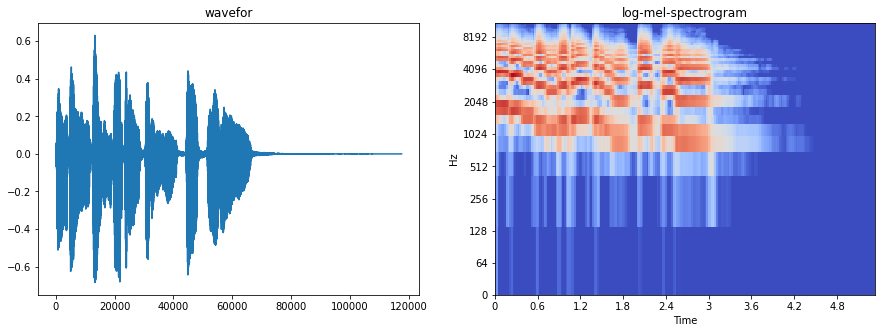

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(y)
plt.title('wavefor')
plt.subplot(1,2,2)
librosa.display.specshow(log_mel_spectrogram,x_axis='time', y_axis="log")
plt.title('log-mel-spectrogram')

# 6.3 Transposed Convolution

## 6.3.1 Transposed Convolution 정의 1: Dilation & Padding으로 정의

In [ ]:
import torch
import numpy as np
import torch.nn.functional as F

In [ ]:
H=4;W=3
pad = 1
stride=2
kernel_size = 3
in_channel = 1; out_channel = 2
batch_size = 1
image = np.arange(batch_size*in_channel*H*W).reshape(batch_size,in_channel,H,W).astype(np.float32)  # (N,C,H,W)   random image
image = torch.tensor(image)
print(f"random image: \n{image}")

weight = torch.randn(in_channel,out_channel,kernel_size,kernel_size)
out = F.conv_transpose2d(image,weight,padding=pad,stride=stride)

print(f'output size: {(H-1)*stride - 2*pad+ + kernel_size} x {(W-1)*stride - 2*pad+ + kernel_size}')
#print(f'weight: {weight}')
print(f'transposed convolution by pytorch: {out.shape}\n{out}')


# transpose convolution by normal convolution
image_stride = np.zeros((batch_size,in_channel,(H-1)*stride+1,(W-1)*stride+1))

image_stride[:,:,::stride,::stride] = image
image_stride = torch.tensor(image_stride,dtype=torch.float32)

print(f'new image: \n{image_stride}')
image_padded = F.pad(image_stride,(kernel_size-1 - pad,kernel_size-1 - pad,kernel_size-1 - pad,kernel_size-1 - pad))
print(f'padded image: {image_padded.shape}\n{image_padded}')

out2 = F.conv2d(image_padded,torch.flip(weight,[2,3]).transpose(0,1),padding=0,stride = 1)  # padding, stride를 이미 반영했기 때문에 padding=0, stride=1
print(f'transposed convolution by noraml convolution: {out2.shape}\n{out2}')

print(np.allclose(out.numpy(), out2.numpy()))

random image: 
tensor([[[[ 0.,  1.,  2.],
          [ 3.,  4.,  5.],
          [ 6.,  7.,  8.],
          [ 9., 10., 11.]]]])
output size: 7 x 5
transposed convolution by pytorch: torch.Size([1, 2, 7, 5])
tensor([[[[  0.0000,  -0.8340,   0.5376,  -2.2375,   1.0752],
          [  1.0160,   7.4465,   2.4022,   9.6812,   3.7884],
          [  1.6127,  -5.0446,   2.1503,  -6.4481,   2.6879],
          [  5.1745,  14.1507,   6.5607,  16.3855,   7.9469],
          [  3.2255,  -9.2552,   3.7631, -10.6587,   4.3007],
          [  9.3331,  20.8549,  10.7193,  23.0897,  12.1055],
          [  4.8382, -13.4658,   5.3758, -14.8693,   5.9134]],

         [[  0.0000,  -0.5291,  -0.1537,  -3.2596,  -0.3074],
          [ -2.9609,   0.4551,  -5.7640,  -0.7797,  -8.5671],
          [ -0.4611,  -8.7206,  -0.6148, -11.4511,  -0.7685],
          [-11.3703,  -3.2491, -14.1734,  -4.4838, -16.9765],
          [ -0.9222, -16.9121,  -1.0759, -19.6426,  -1.2295],
          [-19.7796,  -6.9532, -22.5828,  -8.1879

In [ ]:
weight

## 6.3.3 Transposed Convolution 성질: backward pass

In [ ]:
# pad=0, stride=1 인 경우
H=4;W=4
pad = 0; stride=1
kernel_size = 3
in_channel = 1; out_channel = 1
batch_size = 1

X = torch.randn(batch_size,in_channel,H,W, requires_grad=True)  #(N,C,H,W)

weight = torch.randn(out_channel,in_channel,kernel_size,kernel_size)

Y = F.conv2d(X,weight,padding=pad,stride=stride)
print(f'X shape: {X.shape}, Y shape: {Y.shape}')

dY = torch.randn(Y.size())  # Y의 upstream gradient를 random하게 생성

Y.backward(dY)
print(f'gradient of X: {X.shape}\n{X.grad}')

transposed_conv_output = F.conv_transpose2d(dY,weight,padding=pad,stride=stride)

print(f'transposed Conv: {transposed_conv_output.shape}\n{transposed_conv_output}')

### 일반화
- weight에 padding을 해야 한다.

In [ ]:
# padding, stride 있는 경우
H=5;W=5
pad = 2; stride = 3
kernel_size = 3
in_channel = 1; out_channel = 1
batch_size = 1
assert int((H+2*pad-kernel_size)/stride) +1 > 0
assert int((W+2*pad-kernel_size)/stride) +1 > 0
X = torch.randn(batch_size,in_channel,H,W, requires_grad=True)  #(N,C,H,W)

weight = torch.randn(out_channel,in_channel,kernel_size,kernel_size)

Y = F.conv2d(X,weight,padding=pad,stride=stride)
print(f'X shape: {X.shape}, Y shape: {Y.shape}')

dY = torch.randn(Y.size())  # Y의 upstream gradient를 random하게 생성

Y.backward(dY)
print(f'gradient of X: {X.shape}\n{X.grad}')

output_H = (Y.shape[2]-1)*stride-2*pad+kernel_size
output_W = (Y.shape[3]-1)*stride-2*pad+kernel_size

weight_pad = F.pad(weight,(0,max(H-output_H,0),0,max(W-output_W,0)))
transposed_conv_output = F.conv_transpose2d(dY,weight_pad,padding=pad,stride=stride)

print(f'transposed Conv: {transposed_conv_output.shape}\n{transposed_conv_output}')

print(np.allclose(X.grad.numpy(), transposed_conv_output.numpy()))

# 6.4 Generative Adversarial Networks



In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 6.4.1 Fashion MNIST Dataset

In [ ]:
# Prepare the dataset. We use both the training & test MNIST digits.
Data_Flag = 'MNIST'  # 'MNIST', 'Fashion'
batch_size = 256

if Data_Flag == 'MNIST':
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    text_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
elif Data_Flag == 'Fashion':
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

all_data = np.concatenate([x_train, x_test])
all_labels = np.concatenate([y_train, y_test])
all_data = all_data.astype("float32")
all_data = (all_data - 127.5) / 127.5  # [-1,1] 사이값
all_data = np.reshape(all_data, (-1, 28, 28, 1))
dataset = tf.data.Dataset.from_tensor_slices(all_data)
dataset = dataset.shuffle(buffer_size=batch_size*10).batch(batch_size)

test_latent = np.random.randn(8, latent_dim)

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    img_index = np.random.randint(0, 60000)
    plt.imshow(all_data[img_index,:,:,0], cmap="gray_r")
    plt.xlabel(text_labels[all_labels[img_index]])

## 6.4.3 Tensorflow로 GAN 구현

- tensorflow same padding은 출력 크기가 $H\times s$가 되도록 padding 조절
- fashion mnist: (60000,28,28),(10000,28,28), 0-255사이값
- 여러가지 모델 구현
  * Model #1: UpSampling2D
  * Model #2: BN 없는 구조
  * Model #3: Conv2DTranspose + BN + 마지막에 Conv2D
  * Model #4: Conv2DTranspose + BN
- DCGAN 논문에서 제시한 lr=0.0002, $\beta_1=0.5$

In [ ]:
# Create the discriminator

img_shape = (28,28,1)
discriminator = tf.keras.Sequential(
    [
        tf.keras.Input(shape=img_shape),
        tf.keras.layers.Conv2D(32,kernel_size=3,strides=2,padding="same"),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(64,kernel_size=3,strides=2,padding="same",use_bias=False),
        tf.keras.layers.BatchNormalization(momentum=0.8),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(128,kernel_size=3,strides=2,padding="same",use_bias=False),
        tf.keras.layers.BatchNormalization(momentum=0.8),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(256,kernel_size=3,strides=1,padding="same",use_bias=False),
        tf.keras.layers.BatchNormalization(momentum=0.8),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ],
    name="discriminator",
)

discriminator2 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=img_shape),
        tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same"),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same"),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.GlobalMaxPooling2D(),
        tf.keras.layers.Dense(1,activation='sigmoid'),
    ],
    name="discriminator2",
)

discriminator3 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=img_shape),
        tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding="same",use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding="same",use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1,activation='sigmoid'),
    ],
    name="discriminator3",
)

discriminator4 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=img_shape),
        tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding="same",use_bias=False),  # (14,14,64)
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding="same",use_bias=False), # (7,7,128)
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1,activation='sigmoid'),
    ],
    name="discriminator4",
)


# Create the generator
latent_dim = 100
generator = tf.keras.Sequential([
        tf.keras.Input(shape=(latent_dim,)),
        tf.keras.layers.Dense(7 * 7 * 128,activation='relu'),
        tf.keras.layers.Reshape((7, 7, 128)),
        tf.keras.layers.UpSampling2D(),  # (14,14,128)
        tf.keras.layers.Conv2D(128,kernel_size=3,padding="same",use_bias=False),
        tf.keras.layers.BatchNormalization(momentum=0.8),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.UpSampling2D(),  # (28,28,128)
        tf.keras.layers.Conv2D(64,kernel_size=3,padding="same",use_bias=False),  # (28,28,64)
        tf.keras.layers.BatchNormalization(momentum=0.8),
        tf.keras.layers.Activation("relu"),
        tf.keras.layers.Conv2D(1,kernel_size=3,padding="same",activation='tanh')],  # (28,28,1)
    name="generator")

generator2 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(latent_dim,)),
        tf.keras.layers.Dense(7 * 7 * 128,activation='relu'),
        tf.keras.layers.Reshape((7, 7, 128)),
        tf.keras.layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same",activation='relu'),  # (14,14,128)
        tf.keras.layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same",activation='relu'),  # (28,28,128)
        tf.keras.layers.Conv2D(1, (7, 7), padding="same", activation="tanh"),                            # (28,28,1)
    ],
    name="generator2",
)

generator3 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(latent_dim,)),
        tf.keras.layers.Dense(7 * 7 * 256,use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Reshape((7, 7, 256)),
        tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding="same",use_bias=False),  # (14,14,128)
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding="same",use_bias=False),   # (28,28,64)
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Conv2D(1, (5, 5), padding="same", activation="tanh"),                         # (28,28,1)
    ],
    name="generator3",
)

generator4 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(latent_dim,)),
        tf.keras.layers.Dense(7 * 7 * 256,use_bias=False),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Reshape((7, 7, 256)),
        tf.keras.layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same",use_bias=False),  # (14,14,128)
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Conv2DTranspose(1, (4, 4), strides=(2, 2), padding="same",use_bias=True,activation='tanh'),  # (28,28,1)
    ],
    name="generator4",
)

In [ ]:
generator4.summary()
#discriminator4.summary()

In [ ]:
class GAN(tf.keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_images):

        # Sample random points in the latent space
        batch_size = tf.shape(real_images)[0]
        latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_images = self.generator(latent_vectors,training=True)
            fake_output = self.discriminator(generated_images, training=True)
            real_output = self.discriminator(real_images, training=True)

            real_loss = self.loss_fn(tf.ones_like(real_output), real_output)
            fake_loss = self.loss_fn(tf.zeros_like(fake_output), fake_output)
            #disc_loss = (real_loss + fake_loss)/2
            disc_loss = real_loss + fake_loss

            gen_loss = self.loss_fn(tf.ones_like(fake_output), fake_output)


        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

        self.g_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))
        self.d_optimizer.apply_gradients(zip(gradients_of_discriminator, self.discriminator.trainable_variables))

        return {"d_loss": disc_loss, "g_loss": gen_loss}

In [ ]:
class PlotCallback(tf.keras.callbacks.Callback):
    def __init__(self,latent):
        self.latent = latent

    def on_epoch_end(self, epoch, logs=None):
        predictions = self.model.generator(self.latent, training=False).numpy() # (N,28,28,1)

        fig = plt.figure(figsize=(10,2))
        predictions = predictions[..., 0].transpose(1,0,2).reshape(28,-1) # (28,N*28)
        #predictions = np.concatenate(predictions[...,0],axis=1)
        plt.imshow(predictions, cmap='gray_r')
        plt.axis('off')
        plt.show()
plot_cb = PlotCallback(test_latent)

### Model #1 훈련

In [ ]:
gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0004,beta_1=0.,beta_2=0.9),
    g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.,beta_2=0.9),
    loss_fn=tf.keras.losses.BinaryCrossentropy(from_logits=False))

Epoch 1/20
273/274 [============================>.] - ETA: 0s - d_loss: 1.1768 - g_loss: 2.0719

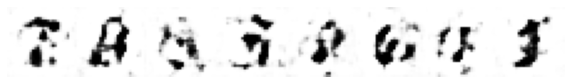

274/274 [==============================] - 17s 57ms/step - d_loss: 1.1762 - g_loss: 2.0709
Epoch 2/20
273/274 [============================>.] - ETA: 0s - d_loss: 0.9760 - g_loss: 1.5785

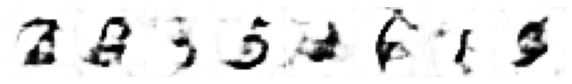

274/274 [==============================] - 16s 57ms/step - d_loss: 0.9755 - g_loss: 1.5823
Epoch 3/20
273/274 [============================>.] - ETA: 0s - d_loss: 0.9749 - g_loss: 1.5958

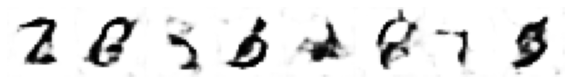

274/274 [==============================] - 16s 57ms/step - d_loss: 0.9746 - g_loss: 1.5941
Epoch 4/20
273/274 [============================>.] - ETA: 0s - d_loss: 0.9811 - g_loss: 1.5058

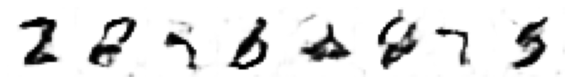

274/274 [==============================] - 15s 56ms/step - d_loss: 0.9808 - g_loss: 1.5012
Epoch 5/20
273/274 [============================>.] - ETA: 0s - d_loss: 0.9153 - g_loss: 1.5643

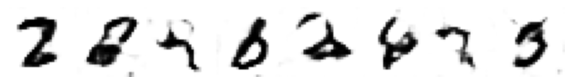

274/274 [==============================] - 16s 58ms/step - d_loss: 0.9155 - g_loss: 1.5728
Epoch 6/20
273/274 [============================>.] - ETA: 0s - d_loss: 0.8667 - g_loss: 1.6530

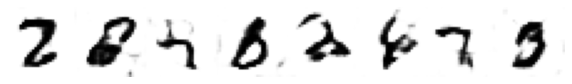

274/274 [==============================] - 16s 60ms/step - d_loss: 0.8666 - g_loss: 1.6491
Epoch 7/20
273/274 [============================>.] - ETA: 0s - d_loss: 0.8521 - g_loss: 1.6928

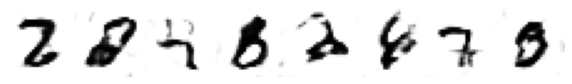

274/274 [==============================] - 16s 57ms/step - d_loss: 0.8520 - g_loss: 1.6963
Epoch 8/20
273/274 [============================>.] - ETA: 0s - d_loss: 0.8397 - g_loss: 1.7255

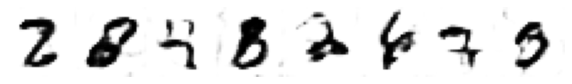

274/274 [==============================] - 16s 57ms/step - d_loss: 0.8399 - g_loss: 1.7198
Epoch 9/20
273/274 [============================>.] - ETA: 0s - d_loss: 0.8451 - g_loss: 1.7570

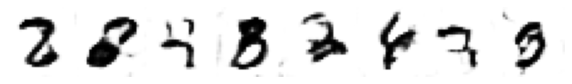

274/274 [==============================] - 16s 57ms/step - d_loss: 0.8435 - g_loss: 1.7537
Epoch 10/20
273/274 [============================>.] - ETA: 0s - d_loss: 0.8389 - g_loss: 1.7766

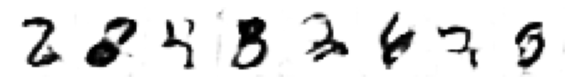

274/274 [==============================] - 16s 57ms/step - d_loss: 0.8362 - g_loss: 1.7797
Epoch 11/20
273/274 [============================>.] - ETA: 0s - d_loss: 0.8392 - g_loss: 1.7929

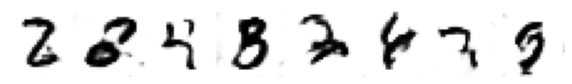

274/274 [==============================] - 16s 57ms/step - d_loss: 0.8387 - g_loss: 1.7904
Epoch 12/20
273/274 [============================>.] - ETA: 0s - d_loss: 0.8438 - g_loss: 1.7994

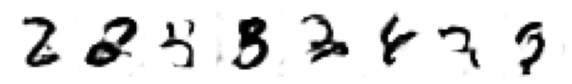

274/274 [==============================] - 16s 57ms/step - d_loss: 0.8419 - g_loss: 1.7964
Epoch 13/20
273/274 [============================>.] - ETA: 0s - d_loss: 0.8547 - g_loss: 1.8088

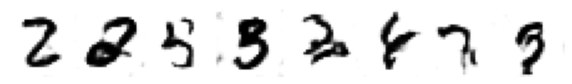

274/274 [==============================] - 16s 57ms/step - d_loss: 0.8533 - g_loss: 1.8120
Epoch 14/20
273/274 [============================>.] - ETA: 0s - d_loss: 0.8523 - g_loss: 1.8112

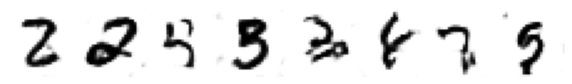

274/274 [==============================] - 16s 57ms/step - d_loss: 0.8518 - g_loss: 1.8081
Epoch 15/20
273/274 [============================>.] - ETA: 0s - d_loss: 0.8616 - g_loss: 1.7956

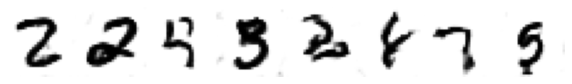

274/274 [==============================] - 16s 57ms/step - d_loss: 0.8613 - g_loss: 1.7912
Epoch 16/20
273/274 [============================>.] - ETA: 0s - d_loss: 0.8738 - g_loss: 1.7922

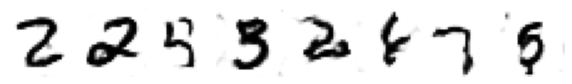

274/274 [==============================] - 16s 57ms/step - d_loss: 0.8769 - g_loss: 1.7989
Epoch 17/20
273/274 [============================>.] - ETA: 0s - d_loss: 0.8760 - g_loss: 1.7863

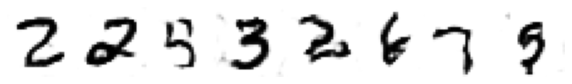

274/274 [==============================] - 16s 57ms/step - d_loss: 0.8769 - g_loss: 1.7850
Epoch 18/20
273/274 [============================>.] - ETA: 0s - d_loss: 0.8863 - g_loss: 1.7877

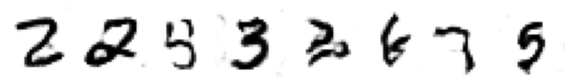

274/274 [==============================] - 16s 57ms/step - d_loss: 0.8873 - g_loss: 1.7800
Epoch 19/20
273/274 [============================>.] - ETA: 0s - d_loss: 0.8955 - g_loss: 1.7761

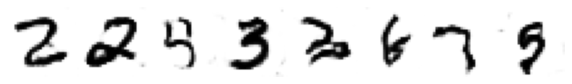

274/274 [==============================] - 16s 57ms/step - d_loss: 0.8934 - g_loss: 1.7758
Epoch 20/20
273/274 [============================>.] - ETA: 0s - d_loss: 0.9026 - g_loss: 1.7609

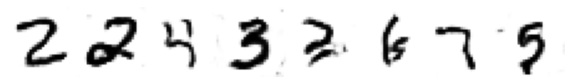

274/274 [==============================] - 16s 57ms/step - d_loss: 0.9002 - g_loss: 1.7701


In [ ]:
gan.fit(dataset, epochs=20,callbacks=[plot_cb])

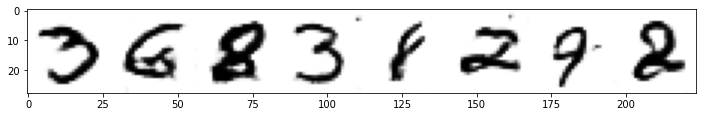

In [ ]:
x = tf.random.normal(shape=(8, latent_dim))
outputs = generator(x) # training=False 생략 가능
outputs = np.concatenate(outputs[...,0],axis=1)
plt.figure(figsize=(12,4))
plt.imshow(outputs,cmap='binary')

In [ ]:
gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0004,beta_1=0.5,beta_2=0.999),
    g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.5,beta_2=0.999),
    loss_fn=tf.keras.losses.BinaryCrossentropy(from_logits=False),
)

In [ ]:
gan.fit(dataset, epochs=50,callbacks=[plot_cb])

In [ ]:
x = tf.random.normal(shape=(8, latent_dim))
outputs = generator(x)
outputs = np.concatenate(outputs[:,:,:,0],axis=1)
plt.figure(figsize=(12,4))
plt.imshow(outputs,cmap='binary')

### Model #2 훈련

In [ ]:
gan2 = GAN(discriminator=discriminator2, generator=generator2, latent_dim=latent_dim)
gan2.compile(
    d_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003,beta_1=0.,beta_2=0.9),
    g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003,beta_1=0.,beta_2=0.9),
    loss_fn=tf.keras.losses.BinaryCrossentropy(from_logits=False),
)

In [ ]:
gan2.fit(dataset, epochs=20,callbacks=[plot_cb])

In [ ]:
x = tf.random.normal(shape=(8, latent_dim))
outputs = generator2(x)
outputs = np.concatenate(outputs[:,:,:,0],axis=1)
plt.figure(figsize=(12,4))
plt.imshow(outputs,cmap='binary')

In [ ]:
gan2.fit(dataset, epochs=50,callbacks=[plot_cb])

In [ ]:
x = tf.random.normal(shape=(8, latent_dim))
outputs = generator2(x)
outputs = np.concatenate(outputs[:,:,:,0],axis=1)
plt.figure(figsize=(12,4))
plt.imshow(outputs,cmap='binary')

### Model #3 훈련

In [ ]:
gan3 = GAN(discriminator=discriminator3, generator=generator3, latent_dim=latent_dim)
gan3.compile(
    d_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002,beta_1 = 0.5),
    g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002,beta_1 = 0.5),
    loss_fn=tf.keras.losses.BinaryCrossentropy(from_logits=False),
)

In [ ]:
gan3.fit(dataset, epochs=20,callbacks=[plot_cb])

In [ ]:
x = tf.random.normal(shape=(8, latent_dim))
outputs = generator3(x)
outputs = np.concatenate(outputs[:,:,:,0],axis=1)
plt.figure(figsize=(12,4))
plt.imshow(outputs,cmap='binary')

In [ ]:
gan3.fit(dataset, epochs=50,callbacks=[plot_cb])

In [ ]:
x = tf.random.normal(shape=(8, latent_dim))
outputs = generator3(x)
outputs = np.concatenate(outputs[:,:,:,0],axis=1)
plt.figure(figsize=(12,4))
plt.imshow(outputs,cmap='binary')

### Model #4 훈련

In [ ]:
gan4 = GAN(discriminator=discriminator4, generator=generator4, latent_dim=latent_dim)
gan4.compile(
    d_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0004,beta_1=0.,beta_2=0.9),
    g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.,beta_2=0.9),
    loss_fn=tf.keras.losses.BinaryCrossentropy(from_logits=False),
)

In [ ]:
gan4.fit(dataset, epochs=20,callbacks=[plot_cb])

In [ ]:
x = tf.random.normal(shape=(8, latent_dim))
outputs = generator4(x)
outputs = np.concatenate(outputs[:,:,:,0],axis=1)
plt.figure(figsize=(12,4))
plt.imshow(outputs,cmap='binary')

In [ ]:
gan4.fit(dataset, epochs=50,callbacks=[plot_cb])

In [ ]:
x = tf.random.normal(shape=(8, latent_dim))
outputs = generator4(x)
outputs = np.concatenate(outputs[:,:,:,0],axis=1)
plt.figure(figsize=(12,4))
plt.imshow(outputs,cmap='binary')

## 6.4.4 InfoGAN

In [ ]:
import torch
import numpy as np
import torch.nn.functional as F
import itertools,time

import torchvision.datasets as datasets
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

### MNIST Data Loading

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), lambda x: 2*x-1])

download_root = '.'
train_dataset = datasets.MNIST(download_root, transform=transform, train=True, download=True) # 60,000
test_dataset = datasets.MNIST(download_root, transform=transform, train=False, download=True) # 10,000
dataset = ConcatDataset([train_dataset,test_dataset]) # 70,000

In [ ]:
batch_size = 256
dataloader = DataLoader(dataset, batch_size=batch_size,shuffle=True)

### InfoGAN 모델 구현

In [ ]:
class Generator(torch.nn.Module):
    def __init__(self,latent_dim,code_dim):
        # code_dim = discrete_dim+continuous_dim
        super(Generator, self).__init__()

        self.fc1 = torch.nn.Linear(latent_dim+code_dim,1024,bias=False)
        self.bn2 = torch.nn.BatchNorm1d(1024)
        self.fc3 = torch.nn.Linear(1024,7*7*128,bias=False)
        self.bn4 = torch.nn.BatchNorm1d(7*7*128)
        self.tconv5 = torch.nn.ConvTranspose2d(128,64,kernel_size=4,stride=2,padding=1,bias=False)
        self.bn6 = torch.nn.BatchNorm2d(64)
        self.tconv7 = torch.nn.ConvTranspose2d(64,1,kernel_size=4,stride=2,padding=1)

    def forward(self,x,code):
        # x: (N,D), code: (N,C)
        x = torch.cat([x,code],dim=-1)
        x = self.fc1(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = self.bn4(x)
        x = F.relu(x)
        x = x.reshape(-1,128,7,7)
        x = self.tconv5(x) # (N,64,14,14)
        x = self.bn6(x)
        x = F.relu(x)
        x = self.tconv7(x) # (N,1,28,28)
        x = torch.tanh(x)  # (N,1,28,28)
        return x

class Discriminator(torch.nn.Module):
    def __init__(self,code_dim):
        # code_dim = discrete_dim+continuous_dim
        super(Discriminator, self).__init__()
        self.conv1 = torch.nn.Conv2d(1,64,kernel_size=5,stride=2,padding=2,bias=False)  # (N,1,28,28) -> (N,64,14,14)
        self.bn2 = torch.nn.BatchNorm2d(64)
        self.conv3 = torch.nn.Conv2d(64,128,kernel_size=5,stride=2,padding=2,bias=False)  # (N,64,14,14) -> (N,128,7,7)
        self.bn4 = torch.nn.BatchNorm2d(128)
        self.fc5 = torch.nn.Linear(128*7*7,1)  # --> logits

        self.recon_fc1 = torch.nn.Linear(128*7*7,64)
        self.recon_fc2 = torch.nn.Linear(64,code_dim)

    def forward(self,x):
        # x: (N,1,28,28)
        x = self.conv1(x)
        x = self.bn2(x)
        x = F.leaky_relu(x,0.2)
        x = self.conv3(x)
        x = self.bn4(x)
        x = F.leaky_relu(x,0.2)
        x = x.reshape(-1,128*7*7)
        logits = self.fc5(x)


        z = self.recon_fc1(x)
        z = F.leaky_relu(z,0.2)
        recon_logits = self.recon_fc2(z)
        return logits, recon_logits


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device: ", device)

latent_dim = 100
discrete_dim = 10
continuous_dim = 2

G = Generator(latent_dim,discrete_dim+continuous_dim)
D = Discriminator(discrete_dim+continuous_dim)

g_lr = 0.001
d_lr = 0.0002
recon_lr = 0.001
gen_optimizer = torch.optim.Adam(G.parameters(),g_lr,betas=(0.5, 0.9))
dis_optimizer = torch.optim.Adam(D.parameters(),d_lr,betas=(0.5, 0.9))
recon_optimizer = torch.optim.Adam(itertools.chain(G.parameters(), D.parameters()),d_lr,betas=(0.5, 0.9))

bce_loss_fn = torch.nn.BCEWithLogitsLoss()
recon_ce_loss_fn = torch.nn.CrossEntropyLoss()
recon_mse_loss_fn = torch.nn.MSELoss()

G.to(device)
D.to(device)

device:  cuda


Discriminator(
  (conv1): Conv2d(1, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), bias=False)
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc5): Linear(in_features=6272, out_features=1, bias=True)
  (recon_fc1): Linear(in_features=6272, out_features=64, bias=True)
  (recon_fc2): Linear(in_features=64, out_features=12, bias=True)
)

In [ ]:
def generate_latent(batch_size,latent_dim,discrete_dim,continuous_dim,device):
    z = torch.randn(batch_size,latent_dim,device=device)
    discrete_code = torch.randint(0,discrete_dim,(batch_size,),device=device)
    continuous_code = torch.randn(batch_size,continuous_dim,device=device)
    code = torch.cat([F.one_hot(discrete_code,discrete_dim),continuous_code],dim=-1)
    return z, code

### Model Train

epoch: 1, g_loss: 0.9604325866612204, d_loss: 1.2561275939436725, recon_loss: 2.856479068742181, elapsed: 43.50996685028076


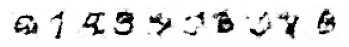

epoch: 2, g_loss: 0.819755035377767, d_loss: 1.3322275794335525, recon_loss: 1.6800171001984254, elapsed: 68.08665704727173


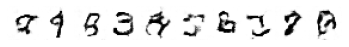

epoch: 3, g_loss: 0.800460046660291, d_loss: 1.3337110098261034, recon_loss: 0.921430823141641, elapsed: 92.67323923110962


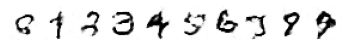

epoch: 4, g_loss: 0.7919795395684068, d_loss: 1.352109595371859, recon_loss: 0.4656912275474437, elapsed: 122.52360010147095


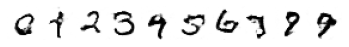

epoch: 5, g_loss: 0.7809431291844723, d_loss: 1.367060862753513, recon_loss: 0.29865424438332117, elapsed: 153.42587518692017


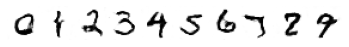

epoch: 6, g_loss: 0.7611124030429951, d_loss: 1.3892675494625621, recon_loss: 0.22557330126092381, elapsed: 177.97811651229858


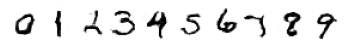

epoch: 7, g_loss: 0.7517530624448818, d_loss: 1.3949781686720186, recon_loss: 0.1841895970495513, elapsed: 202.30861616134644


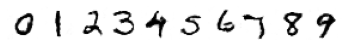

epoch: 8, g_loss: 0.7496264078756318, d_loss: 1.397466205332401, recon_loss: 0.15607328356726327, elapsed: 227.1790976524353


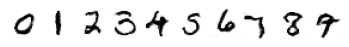

epoch: 9, g_loss: 0.745059170862184, d_loss: 1.396892011165619, recon_loss: 0.13325296241762866, elapsed: 251.80720925331116


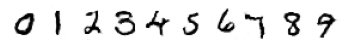

epoch: 10, g_loss: 0.7433734314285055, d_loss: 1.3974123993059144, recon_loss: 0.11712923689480245, elapsed: 282.1397018432617


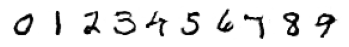

epoch: 11, g_loss: 0.7372070944657291, d_loss: 1.3989796042442322, recon_loss: 0.10673054024903443, elapsed: 308.61918926239014


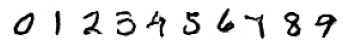

epoch: 12, g_loss: 0.7359830617469593, d_loss: 1.3965946592553689, recon_loss: 0.09718437745732113, elapsed: 333.7075922489166


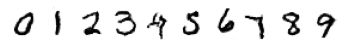

epoch: 13, g_loss: 0.7319077738445171, d_loss: 1.3967956291498058, recon_loss: 0.08602904475355236, elapsed: 358.3241055011749


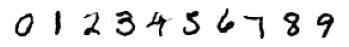

epoch: 14, g_loss: 0.7325292945343213, d_loss: 1.3955420629821556, recon_loss: 0.08126810802160388, elapsed: 385.8337597846985


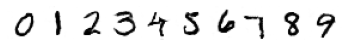

epoch: 15, g_loss: 0.7302019050086501, d_loss: 1.3936812024917045, recon_loss: 0.07407224296598974, elapsed: 410.0113878250122


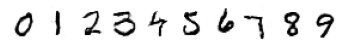

epoch: 16, g_loss: 0.7298141013096718, d_loss: 1.3962659840166134, recon_loss: 0.06892593882053438, elapsed: 438.25073981285095


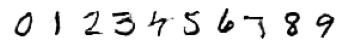

epoch: 17, g_loss: 0.7302091828662983, d_loss: 1.3933032825045342, recon_loss: 0.0656412324195143, elapsed: 462.2777101993561


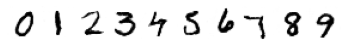

epoch: 18, g_loss: 0.7260095070313363, d_loss: 1.3946566890626058, recon_loss: 0.06251564445178004, elapsed: 486.4277102947235


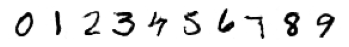

epoch: 19, g_loss: 0.7255431435404033, d_loss: 1.3932793149112785, recon_loss: 0.05861583701504843, elapsed: 510.55223870277405


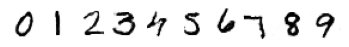

epoch: 20, g_loss: 0.7239260373324373, d_loss: 1.393236760675472, recon_loss: 0.054047174357476024, elapsed: 534.7257771492004


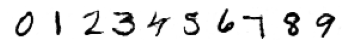

In [ ]:
num_epochs = 20
supervised_flag = True
test_latent = torch.randn(10,latent_dim).to(device)
test_code = torch.cat([torch.eye(10),torch.randn(10,continuous_dim)],dim=-1).to(device)
s_time = time.time()
for i in range(num_epochs):
    g_loss_all = []
    d_loss_all = []
    recon_loss_all = []
    G.train()
    D.train()
    for x,y in dataloader:
        real_imgs = x.to(device)
        real_labels = y.to(device,dtype=torch.int64) # Supervised Learning에 사용된다.
        batch_size = x.size(0) # mini_batch size

        real_target_labels = torch.ones(batch_size,device=device)
        fake_target_labels = torch.zeros(batch_size,device=device)

        z, code = generate_latent(batch_size,latent_dim,discrete_dim,continuous_dim,device)

        fake_imgs = G(z,code)
        fake_logits, _ = D(fake_imgs)
        real_logits, _ = D(real_imgs)

        # step 1-1. discriminator loss
        dis_loss_real = bce_loss_fn(real_logits.reshape(-1),real_target_labels)
        dis_loss_fake = bce_loss_fn(fake_logits.reshape(-1),fake_target_labels)
        dis_loss = dis_loss_fake + dis_loss_real

        # step 1-2. back propagation for discriminator
        dis_optimizer.zero_grad()
        dis_loss.backward()
        dis_optimizer.step()
        d_loss_all.append(dis_loss.item())

        # step 2-1. generator loss
        z, code = generate_latent(batch_size,latent_dim,discrete_dim,continuous_dim,device)

        fake_imgs = G(z,code)
        fake_logits, _ = D(fake_imgs)
        gen_loss = bce_loss_fn(fake_logits.reshape(-1),real_target_labels)

        # step 2-2. back propagation for generator
        gen_optimizer.zero_grad()
        gen_loss.backward()
        gen_optimizer.step()
        g_loss_all.append(gen_loss.item())

        # step 3-1. reconstuctor loss
        z, code = generate_latent(batch_size,latent_dim,discrete_dim,continuous_dim,device)

        fake_imgs = G(z,code)
        _, fake_recon_logits = D(fake_imgs)
        _, real_recon_logits = D(real_imgs) # Supervised Learning에 시용된다.

        recon_discrete_loss = recon_ce_loss_fn(fake_recon_logits[:,:discrete_dim],code[:,:discrete_dim])
        recon_continuous_loss = recon_mse_loss_fn(fake_recon_logits[:,discrete_dim:],code[:,discrete_dim:])

        recon_loss = recon_discrete_loss + recon_continuous_loss

        if supervised_flag:
            recon_loss += recon_ce_loss_fn(real_recon_logits[:,:discrete_dim],real_labels)

        # step 3-3. back propagation for reconstructor
        recon_optimizer.zero_grad()
        recon_loss.backward()
        recon_optimizer.step()
        recon_loss_all.append(recon_loss.item())

    G.eval()
    test_images = G(test_latent,test_code)
    test_images = test_images[:,0,:,:].permute(1,0,2).reshape(28,-1).detach().cpu().numpy()
    print(f'epoch: {i+1}, g_loss: {np.mean(g_loss_all)}, d_loss: {np.mean(d_loss_all)}, recon_loss: {np.mean(recon_loss_all)}, elapsed: {time.time()-s_time}')
    plt.imshow(test_images,cmap='binary')
    plt.axis('off')
    plt.show()

### MNIST 이미지 생성

이미지 생성 #1

In [ ]:
def draw_image(fixed_z=True,fixed_continuous_code=True):
    print(f'supervised_flag: {supervised_flag}, fixed_z: {fixed_z}, fixed_code: {fixed_continuous_code}')
    n = discrete_dim # 이미지 생성 갯수를 discrete_dim으로
    m = 10  # 몇개 행을 생성해 볼 것인가?
    canvas = np.empty((28 * m, 28 * n))
    G.eval()

    for i in range(m):
        if fixed_z:
            # 같은 행에서 latent vector가 동일
            test_z = torch.tile(torch.randn(latent_dim,device=device),(n,1))
        else:
            test_z = torch.randn(n,latent_dim,device=device)
        if fixed_continuous_code:  # 같은 행에서 continuous code가 동일
            code = torch.randn(continuous_dim)
            code = torch.tile(code,(n,1))
        else:
            code = torch.randn(n,continuous_dim)
        test_code = torch.cat([torch.eye(n),code],dim=-1).to(device) # (n,discrete_dim+continuous_dim)
        test_images = G(test_z,test_code)
        test_images = test_images[:,0,:,:].permute(1,0,2).reshape(28,-1).detach().cpu().numpy()
        canvas[i*28:(i+1)*28,:] = test_images
    plt.imshow(canvas,cmap='binary')
    plt.title(f'supervised_flag: {supervised_flag}, fixed_z: {fixed_z}, fixed_code: {fixed_continuous_code}')
    plt.axis('off')

supervised_flag: True, fixed_z: True, fixed_code: True


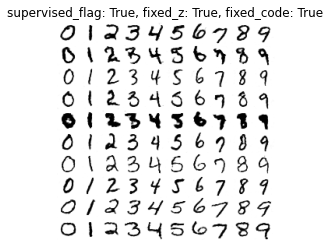

In [ ]:
draw_image(fixed_z=True)

supervised_flag: True, fixed_z: False, fixed_code: False


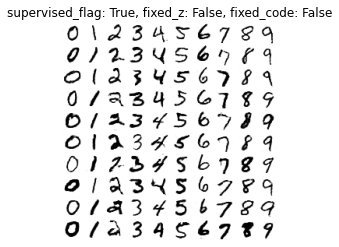

In [ ]:
draw_image(fixed_z=False,fixed_continuous_code=False)

이미지 생성 #2

In [ ]:
assert continuous_dim==2
def draw_image_code_grid(fixed_z=True): # fixed_z=True --> mini-batch내에서 같은 z 사용
    print(f'supervised_flag: {supervised_flag}, fixed_z: {fixed_z}')

    n = 10  # n x n 개의 image을 생성한다.
    canvas = np.empty((28 * n, 28 * n))
    code_range = 2  # [-code_range, code_range] x [-code_range, code_range]에서의 변화 효과 보기
    xx, yy = np.meshgrid(np.linspace(-code_range,code_range,n),np.linspace(-code_range,code_range,n))
    code_grid = np.c_[xx.T.ravel(), yy.T.ravel()]  # (n*n,continuous_dim=2)

    num1 = np.random.randint(0,discrete_dim) # [0,discrete_dim)에서 random하게 숫자 하나 선택

    G.eval()
    # 모든 행의 latent vector는 동일
    # fixed_z=True --> 행 내에서 latent vector가 동일
    if fixed_z:
        test_z = torch.tile(torch.randn(latent_dim,device=device),(n,1))
    else:
        test_z = torch.randn(n,latent_dim,device=device)

    for i in range(n):
        code = np.zeros([n,discrete_dim])
        code[np.arange(n),num1] =  1  # one hot
        code = np.concatenate([code, code_grid[i*n:(i+1)*n,:]],axis=1) # (n,discrete_dim+continuous_dim)

        code = torch.Tensor(code).to(device)
        test_images = G(test_z,code)
        test_images = test_images[:,0,:,:].permute(1,0,2).reshape(28,-1).detach().cpu().numpy()
        canvas[i*28:(i+1)*28,:] = test_images
    plt.imshow(canvas,cmap='binary')
    plt.axis('off')
    plt.title(f'supervised_flag: {supervised_flag}, fixed_z: {fixed_z}')

supervised_flag: True, fixed_z: True


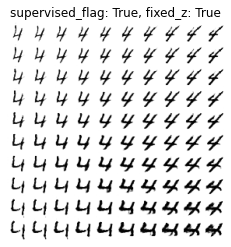

In [ ]:
draw_image_code_grid(fixed_z=True)

supervised_flag: True, fixed_z: False


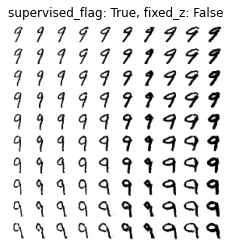

In [ ]:
draw_image_code_grid(fixed_z=False)